## **1. Introduction des données**
### Introduction des données
Le tableau représente les taux d’achèvement au niveau secondaire (en %) par région, sexe, et niveau de vie à Madagascar. Il contient 23 régions, incluant une ligne pour l’ensemble du pays.

Les données sont organisées en 5 colonnes principales :
1. **Région** : Les 23 régions de Madagascar.
2. **Urbain** : Taux d’achèvement en milieu urbain, subdivisé en trois sous-colonnes (masculin, féminin, total).
3. **Rural** : Taux d’achèvement en milieu rural, subdivisé de la même manière.
4. **Total** : Moyenne globale (urbain et rural), subdivisée en masculin, féminin et total.
5. **Quintille de bien-être économique** : Taux d’achèvement par niveau de vie (Plus pauvre, 2e quintille, 3e quintille, 4e quintille, plus riche, Ensemble).


## 2. Visualisations des données

<Figure size 1200x600 with 0 Axes>

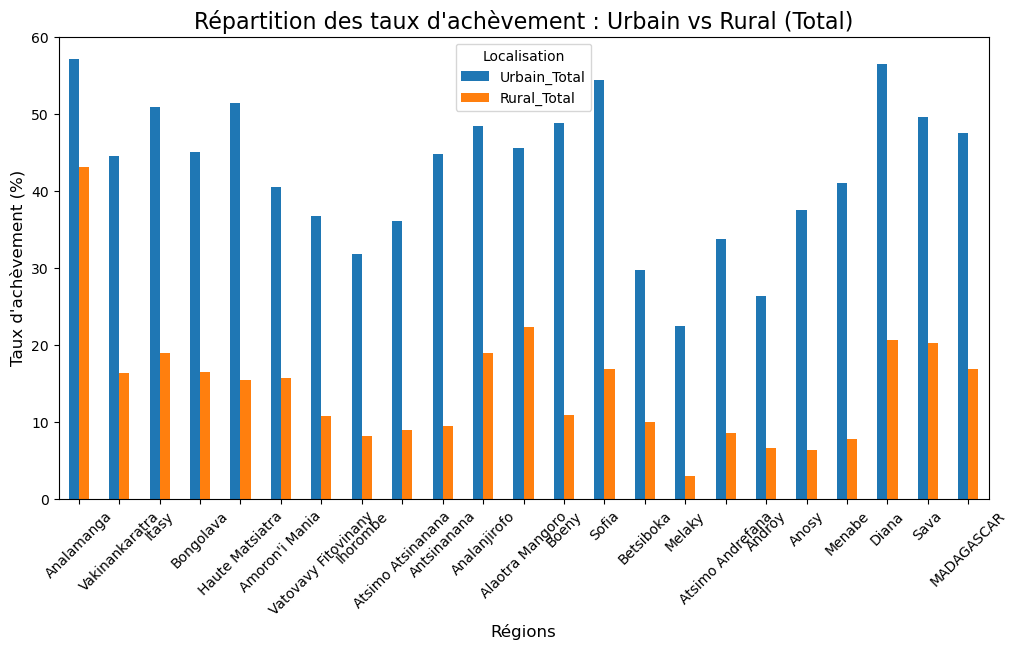

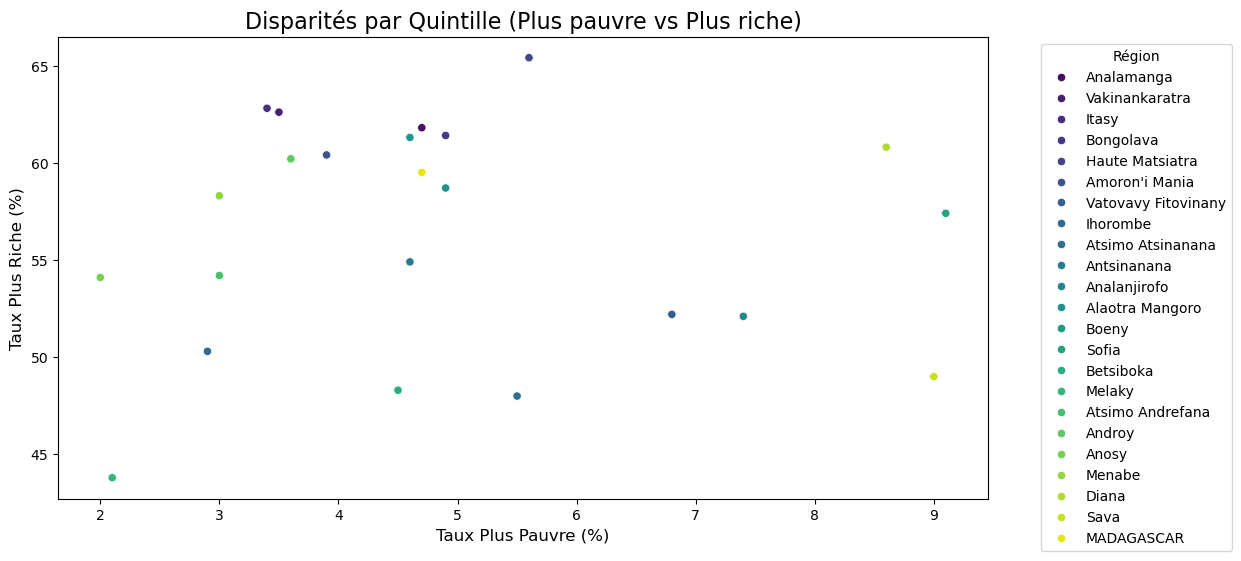

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Charger les données à partir du fichier CSV
df = pd.read_csv("donnees_regions.csv")

# Créer un DataFrame
# df = pd.DataFrame(data)

# Répartition Urbain vs Rural (Total)
plt.figure(figsize=(12, 6))
df[['Région', 'Urbain_Total', 'Rural_Total']].set_index("Région").plot(kind='bar', figsize=(12, 6))
plt.title("Répartition des taux d'achèvement : Urbain vs Rural (Total)", fontsize=16)
plt.ylabel("Taux d'achèvement (%)", fontsize=12)
plt.xlabel("Régions", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Localisation")
plt.show()

# Disparités par Quintille (Plus pauvre vs Plus riche)
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Quintille_Plus_pauvre", y="Quintille_Plus_riche", data=df, hue="Région", palette="viridis")
plt.title("Disparités par Quintille (Plus pauvre vs Plus riche)", fontsize=16)
plt.xlabel("Taux Plus Pauvre (%)", fontsize=12)
plt.ylabel("Taux Plus Riche (%)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Région")
plt.show()


## **3. Clustering des régions avec K-Moyennes**
Pour regrouper les régions, nous utiliserons l'algorithme K-Moyennes et sélectionnerons le nombre optimal de clusters à l'aide de la méthode Elbow (WCSS).


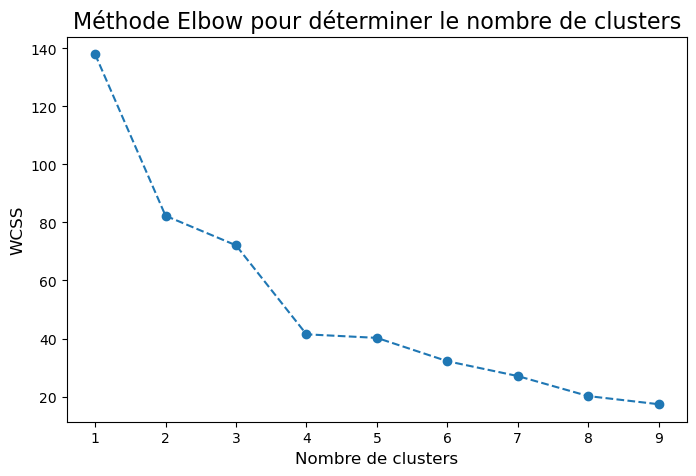

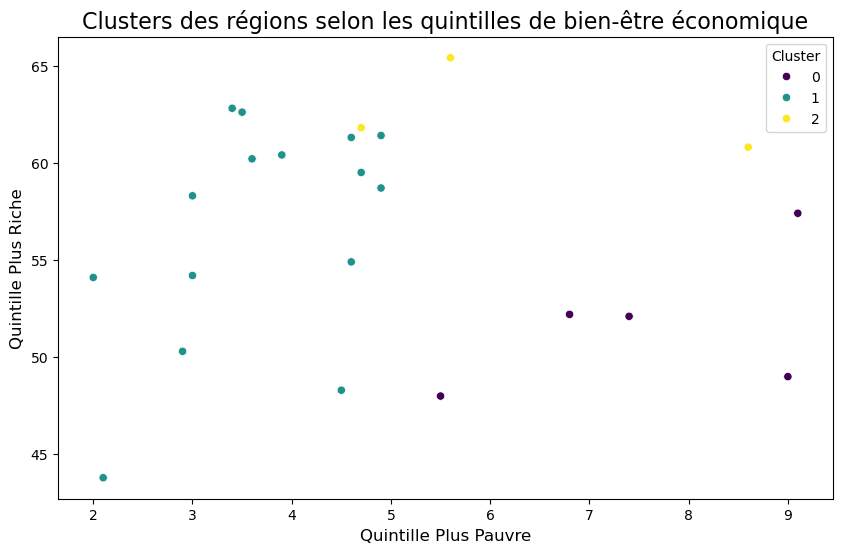

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings  
warnings.filterwarnings('ignore') 

# Variables pour le clustering (quintilles de bien-être économique)
features = ["Quintille_Plus_pauvre", "Quintille_2e", "Quintille_3e", "Quintille_4e", "Quintille_Plus_riche", "Quintille_Ensemble"]

# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Trouver le nombre optimal de clusters (Méthode Elbow)
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Tracer le graphique Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.title("Méthode Elbow pour déterminer le nombre de clusters", fontsize=16)
plt.xlabel("Nombre de clusters", fontsize=12)
plt.ylabel("WCSS", fontsize=12)
plt.show()

# Appliquer K-Moyennes avec le nombre optimal de clusters (par exemple, 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

# Ajouter les clusters au DataFrame
df["Cluster"] = clusters

# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Quintille_Plus_pauvre", y="Quintille_Plus_riche", hue="Cluster", data=df, palette="viridis")
plt.title("Clusters des régions selon les quintilles de bien-être économique", fontsize=16)
plt.xlabel("Quintille Plus Pauvre", fontsize=12)
plt.ylabel("Quintille Plus Riche", fontsize=12)
plt.legend(title="Cluster")
plt.show()

## 4. Interprétation des résultats
#### Clusters obtenus
Les clusters représentent des groupes de régions ayant des profils similaires en termes de taux d’achèvement scolaire par quintille de bien-être économique. 

#### Regroupements significatifs
1. **Cluster 1** : Regroupe des régions avec des disparités importantes entre les plus pauvres et les plus riches.
2. **Cluster 2** : Regroupe des régions où les taux d’achèvement sont relativement homogènes quel que soit le niveau de vie.
3. **Cluster 3** : Regroupe des régions ayant des taux d’achèvement élevés dans toutes les quintilles.

#### Explications possibles
- Les disparités entre les clusters peuvent être expliquées par des différences d'infrastructures, d'accès à l'éducation, ou de politiques locales.
- Les régions urbaines tendent à avoir des taux plus élevés, tandis que les zones rurales, en particulier celles économiquement défavorisées, montrent des résultats plus faibles.